In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.5449 - accuracy: 0.4372 - val_loss: 0.4608 - val_accuracy: 0.4830
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4251 - accuracy: 0.4892 - val_loss: 0.4058 - val_accuracy: 0.4891
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3945 - accuracy: 0.4921 - val_loss: 0.3863 - val_accuracy: 0.4920
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3766 - accuracy: 0.4947 - val_loss: 0.3705 - val_accuracy: 0.4938
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3625 - accuracy: 0.4968 - val_loss: 0.3583 - val_accuracy: 0.4958


In [6]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

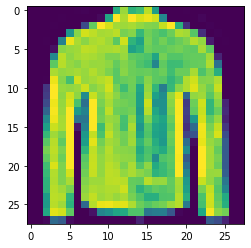

In [7]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

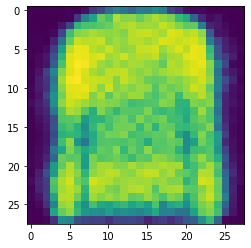

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## Add one more hidden layer to autoencoder

In [9]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en)
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.4801 - accuracy: 0.4641 - val_loss: 0.3921 - val_accuracy: 0.4898
Epoch 2/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.3760 - accuracy: 0.4938 - val_loss: 0.3667 - val_accuracy: 0.4898
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.3527 - accuracy: 0.4982 - val_loss: 0.3436 - val_accuracy: 0.5008
Epoch 4/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.3367 - accuracy: 0.5012 - val_loss: 0.3304 - val_accuracy: 0.4994
Epoch 5/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3283 - accuracy: 0.5024 - val_loss: 0.3267 - val_accuracy: 0.5027


In [10]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

## Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

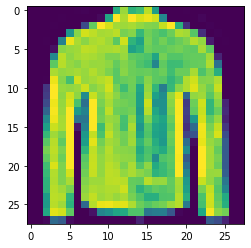

In [11]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

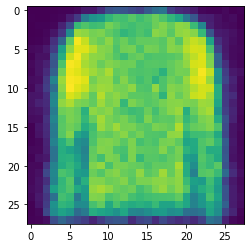

In [12]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## Repeat the question 2 on the denoisening autoencoder

In [13]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.3291 - accuracy: 0.5021 - val_loss: 0.3135 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.3249 - accuracy: 0.5027 - val_loss: 0.3124 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3225 - accuracy: 0.5030 - val_loss: 0.3077 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3205 - accuracy: 0.5033 - val_loss: 0.3047 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.3190 - accuracy: 0.5035 - val_loss: 0.3050 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3175 - accuracy: 0.5038 - val_loss: 0.3020 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [=========

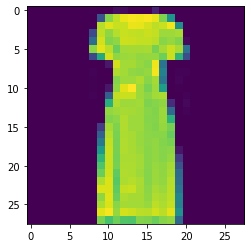

In [14]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

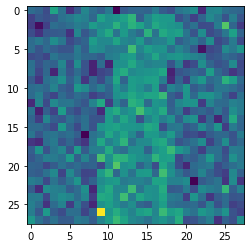

In [15]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [16]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

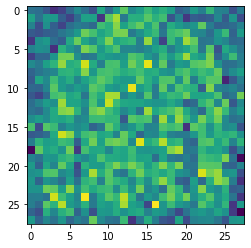

In [17]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

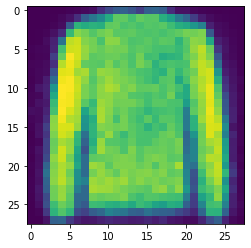

In [18]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## plot loss and accuracy using the history object

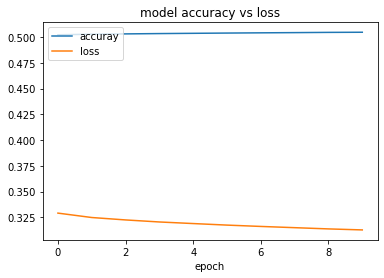

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()